# Mount Google Drive in Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## display the directory
!pwd

/content


# **1. Data Cleaning**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Capstone/Project1Data .csv")

In [ ]:
df.describe()

Has_Transaction_Nov23_May24  Total_Spent_Nov23_May24  Total_Spent_1M  \
count                       6400.0              6400.000000     6400.000000   
mean                           1.0               162.998742       34.455266   
std                            0.0               127.477466       69.569793   
min                            1.0                25.510000        0.000000   
25%                            1.0                79.950000        0.000000   
50%                            1.0               124.355000        0.000000   
75%                            1.0               200.825000       53.960000   
max                            1.0              1379.580000      872.740000   

       Transaction_Count_1M  Total_Spent_3M  Transaction_Count_3M  \
count           6400.000000     6400.000000           6400.000000   
mean               0.292812       62.449945              0.541562   
std                0.518040       94.729159              0.724943   
min                0.000000        0.000000              0.000000   
25%                0.000000        0.000000              0.000000   
50%                0.000000        0.000000              0.000000   
75%                1.000000      107.850000              1.000000   
max                6.000000      960.930000              9.000000   

       Total_Spent_6M  Transaction_Count_6M  Total_Spent_9M  \
count     6400.000000           6400.000000     6400.000000   
mean       114.505731              1.002969      155.998252   
std        135.895771              1.040134      166.667910   
min          0.000000              0.000000        0.000000   
25%          0.000000              0.000000       57.520000   
50%         84.720000              1.000000      115.100000   
75%        161.850000              1.000000      208.820000   
max       1875.750000             20.000000     2698.770000   

       Transaction_Count_9M  ...  EAN_TolerianeMoisturiser40ml  \
count           6400.000000  ...                   6400.000000   
mean               1.377031  ...                      0.127500   
std                1.256906  ...                      0.537391   
min                0.000000  ...                      0.000000   
25%                1.000000  ...                      0.000000   
50%                1.000000  ...                      0.000000   
75%                2.000000  ...                      0.000000   
max               28.000000  ...                      8.000000   

       EAN_HyaluB5Serum30ml  EAN_EffaclarMoisturiser40ml  \
count           6400.000000                  6400.000000   
mean               0.170937                     0.247812   
std                0.485610                     0.660659   
min                0.000000                     0.000000   
25%                0.000000                     0.000000   
50%                0.000000                     0.000000   
75%                0.000000                     0.000000   
max                6.000000                    10.000000   

       EAN_VitaminC10Serum30ml  EAN_RetinolB3Serum30ml  EAN_EffaclarSerum30ml  \
count              6400.000000             6400.000000            6400.000000   
mean                  0.153125                0.170313               0.085469   
std                   0.462018                0.487756               0.315819   
min                   0.000000                0.000000               0.000000   
25%                   0.000000                0.000000               0.000000   
50%                   0.000000                0.000000               0.000000   
75%                   0.000000                0.000000               0.000000   
max                   6.000000                4.000000               5.000000   

       EAN_AntheliosInvisibleSunscreen50ml  EAN_Pure10NiacinamideSerum  \
count                          6400.000000                 6400.000000   
mean                              0.198594                    0.129219   
std              

In [ ]:
df.head(20)

CustomerID  Has_Transaction_Nov23_May24  Total_Spent_Nov23_May24  \
0    LRP00002                            1                   119.81   
1    LRP00004                            1                   461.54   
2    LRP00008                            1                    38.41   
3    LRP00009                            1                   168.25   
4    LRP00012                            1                    82.28   
5    LRP00017                            1                    79.95   
6    LRP00021                            1                    56.61   
7    LRP00024                            1                   192.85   
8    LRP00027                            1                   139.80   
9    LRP00042                            1                   151.90   
10   LRP00066                            1                   112.84   
11   LRP00076                            1                    38.41   
12   LRP00086                            1                   116.85   
13   LRP00093                            1                   129.56   
14   LRP00095                            1                   117.71   
15   LRP00096                            1                   101.90   
16   LRP00099                            1                   211.70   
17   LRP00101                            1                    77.85   
18   LRP00105                            1                    67.40   
19   LRP00107                            1                   107.85   

    Total_Spent_1M  Transaction_Count_1M  Total_Spent_3M  \
0           143.00                     1          143.00   
1             0.00                     0            0.00   
2             0.00                     0            0.00   
3            73.62                     1           73.62   
4             0.00                     0            0.00   
5           115.12                     1          115.12   
6             0.00                     0            0.00   
7           107.90                     1          107.90   
8             0.00                     0            0.00   
9           105.70                     1          105.70   
10            0.00                     0            0.00   
11           45.90                     1           45.90   
12            0.00                     0            0.00   
13          131.81                     1          131.81   
14          123.96                     1          123.96   
15           51.96                     1           51.96   
16           98.80                     2           98.80   
17            0.00                     0          303.50   
18           88.72                     1           88.72   
19           91.84                     1          216.76   

    Transaction_Count_3M  Total_Spent_6M  Transaction_Count_6M  \
0                      1          143.00                     1   
1                      0          189.36                     1   
2                      0          161.59                     1   
3                      1           73.62                     1   
4                      0            0.00                     0   
5                      1          378.10                     3   
6                      0            0.00                     0   
7                      1          107.90                     1   
8                      0           70.85                     1   
9                      1          105.70                     1   
10                     0            0.00                     0   
11                     1           45.90                     1   
12                     0          162.75                     2   
13                     1          131.81                     1   
14                     1          123.96                     1   
15                     1           51.96                     1   
16                     2          158.11                     3   
17                     2          303.50                     2

In [ ]:
# check for missing data
df.columns[df.isnull().any()]

Index(['Post Code'], dtype='object')

In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CustomerID                                6400 non-null   object 
 1   Has_Transaction_Nov23_May24               6400 non-null   int64  
 2   Total_Spent_Nov23_May24                   6400 non-null   float64
 3   Total_Spent_1M                            6400 non-null   float64
 4   Transaction_Count_1M                      6400 non-null   int64  
 5   Total_Spent_3M                            6400 non-null   float64
 6   Transaction_Count_3M                      6400 non-null   int64  
 7   Total_Spent_6M                            6400 non-null   float64
 8   Transaction_Count_6M                      6400 non-null   int64  
 9   Total_Spent_9M                            6400 non-null   float64
 10  Transaction_Count_9M                

Show outlier analysis


# **1.1 Data Preprocessing**

In [ ]:
# Get the necessary columns
columns_to_process = ['Total_Spent_Nov23_May24', 'Total_Spent_1M', 'Transaction_Count_1M',
                      'Total_Spent_3M', 'Transaction_Count_3M', 'Total_Spent_6M',
                      'Transaction_Count_6M', 'Total_Spent_9M', 'Transaction_Count_9M',
                      'Total_Spent_12M', 'Transaction_Count_12M', 'Total_Spent_AllTime',
                      'Transaction_Count_AllTime']

data = df[columns_to_process].copy()



### Log tranformation

In [ ]:
# Apply log transformation to 'Total_Spent' columns
total_spent_columns = [col for col in data.columns if col.startswith('Total_Spent')]
for col in total_spent_columns:
    data[f'{col}_log'] = np.log1p(data[col])
    tdata=data

In [ ]:
data.dropna()


Total_Spent_Nov23_May24  Total_Spent_1M  Transaction_Count_1M  \
0                      119.81          143.00                     1   
1                      461.54            0.00                     0   
2                       38.41            0.00                     0   
3                      168.25           73.62                     1   
4                       82.28            0.00                     0   
...                       ...             ...                   ...   
6395                    55.90            0.00                     0   
6396                   136.80          100.15                     1   
6397                   196.00            0.00                     0   
6398                    58.35           63.40                     1   
6399                   100.90           73.90                     1   

      Total_Spent_3M  Transaction_Count_3M  Total_Spent_6M  \
0             143.00                     1          143.00   
1               0.00                     0          189.36   
2               0.00                     0          161.59   
3              73.62                     1           73.62   
4               0.00                     0            0.00   
...              ...                   ...             ...   
6395          133.85                     1          133.85   
6396          100.15                     1          100.15   
6397          180.67                     1          180.67   
6398           63.40                     1           63.40   
6399           73.90                     1           73.90   

      Transaction_Count_6M  Total_Spent_9M  Transaction_Count_9M  \
0                        1          143.00                     1   
1                        1          189.36                     1   
2                        1          161.59                     1   
3                        1           73.62                     1   
4                        0            0.00                     0   
...                    ...             ...                   ...   
6395                     1          133.85                     1   
6396                     1          100.15                     1   
6397                     1          180.67                     1   
6398                     1           63.40                     1   
6399                     1           73.90                     1   

      Total_Spent_12M  Transaction_Count_12M  Total_Spent_AllTime  \
0              143.00                      1               143.00   
1              189.36                      1               189.36   
2              161.59                      1               161.59   
3               73.62                      1                73.62   
4                0.00                      0                88.85   
...               ...                    ...                  ...   
6395           133.85                      1               133.85   
6396           100.15                      1               100.15   
6397           180.67                      1               180.67   
6398            63.40                      1                63.40   
6399            73.90                      1                73.90   

      Transaction_Count_AllTime  Total_Spent_Nov23_May24_log  \
0                             1                     4.794219   
1                             1                     6.136733   
2                             1                     3.674020   
3                             1                     5.131377   
4                             1                     4.422208   
...                         ...                          ...   
6395                          1                     4.041295   
6396                          1                     4.925803   
6397                          1                     5.283204   
6398                          1                     4.083452   
6399                          1                     4.6239

In [ ]:
# Display processed data description
print("\nProcessed Data Description (after log transformation):")
(data.describe())


Processed Data Description (after log transformation):


Total_Spent_Nov23_May24  Total_Spent_1M  Transaction_Count_1M  \
count              6400.000000     6400.000000           6400.000000   
mean                162.998742       34.455266              0.292812   
std                 127.477466       69.569793              0.518040   
min                  25.510000        0.000000              0.000000   
25%                  79.950000        0.000000              0.000000   
50%                 124.355000        0.000000              0.000000   
75%                 200.825000       53.960000              1.000000   
max                1379.580000      872.740000              6.000000   

       Total_Spent_3M  Transaction_Count_3M  Total_Spent_6M  \
count     6400.000000           6400.000000     6400.000000   
mean        62.449945              0.541562      114.505731   
std         94.729159              0.724943      135.895771   
min          0.000000              0.000000        0.000000   
25%          0.000000              0.000000        0.000000   
50%          0.000000              0.000000       84.720000   
75%        107.850000              1.000000      161.850000   
max        960.930000              9.000000     1875.750000   

       Transaction_Count_6M  Total_Spent_9M  Transaction_Count_9M  \
count           6400.000000     6400.000000           6400.000000   
mean               1.002969      155.998252              1.377031   
std                1.040134      166.667910              1.256906   
min                0.000000        0.000000              0.000000   
25%                0.000000       57.520000              1.000000   
50%                1.000000      115.100000              1.000000   
75%                1.000000      208.820000              2.000000   
max               20.000000     2698.770000             28.000000   

       Total_Spent_12M  Transaction_Count_12M  Total_Spent_AllTime  \
count      6400.000000            6400.000000          6400.000000   
mean        185.010925               1.639844           230.895473   
std         187.458998               1.402944           224.224104   
min           0.000000               0.000000             9.950000   
25%          71.900000               1.000000            91.895000   
50%         135.465000               1.000000           157.585000   
75%         239.810000               2.000000           284.495000   
max        3232.630000              31.000000          3410.430000   

       Transaction_Count_AllTime  Total_Spent_Nov23_May24_log  \
count                6400.000000                  6400.000000   
mean                    2.075156                     4.890505   
std                     1.677874                     0.616868   
min                     1.000000                     3.277522   
25%                     1.000000                     4.393832   
50%                     1.000000                     4.831150   
75%                     3.000000                     5.307401   
max                    31.000000                     7.230259   

       Total_Spent_1M_log  Total_Spent_3M_log  Total_Spent_6M_log  \
count         6400.000000         6400.000000         6400.000000   
mean             1.263563            2.107934            3.322115   
std              2.109462            2.409359            2.365057   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            4.451086   
75%              4.006606            4.689971            5.092830   
max              6.772783            6.868942            7.537297   

       Total_Spent_9M_log  Total_Spent_12M_log  Total_Spent_AllTime_log  
count         6400.000000          6400.000000              6400.000000  
mean             4.073882             4.522150                 5.132003  
std              2.049844             1.705857                 0.765065  
min              0.000000        

In [ ]:
# Removing or Handling Outliers
from scipy import stats
tdata= data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

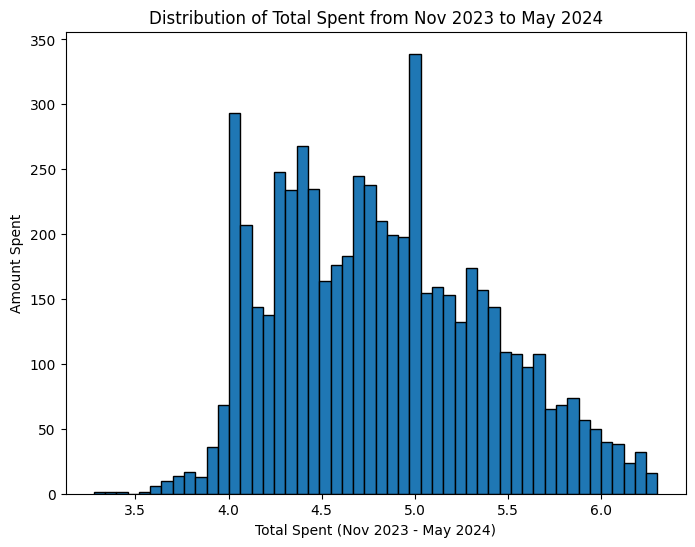

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
plt.hist(tdata['Total_Spent_Nov23_May24_log'], bins=50, edgecolor="black")  # Adjust the number of bins
plt.xlabel("Total Spent (Nov 2023 - May 2024)")
plt.ylabel("Amount Spent")
plt.title("Distribution of Total Spent from Nov 2023 to May 2024")
# plt.grid(True)
plt.show()

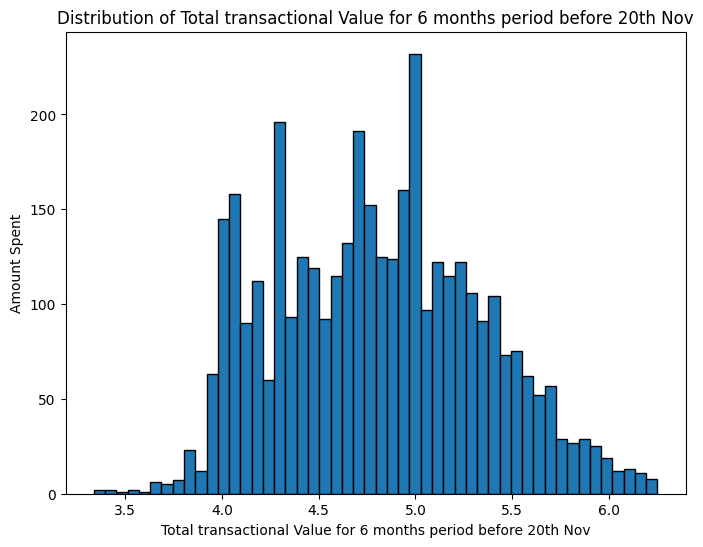

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
tdata_filtered = tdata[tdata['Total_Spent_6M_log'] != 0]
plt.hist(tdata_filtered['Total_Spent_6M_log'], bins=50, edgecolor="black")  # Adjust the number of bins
plt.xlabel("Total transactional Value for 6 months period before 20th Nov")
plt.ylabel("Amount Spent")
plt.title("Distribution of Total transactional Value for 6 months period before 20th Nov")
# plt.grid(True)
plt.show()

# **2.Exploratory Data Analysis (EDA)**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Assuming your DataFrame is called tdata
# Extracting the relevant columns for the box plots
time_period_columns = ['Total_Spent_Nov23_May24', 'Total_Spent_1M', 'Total_Spent_3M',
                       'Total_Spent_6M', 'Total_Spent_9M', 'Total_Spent_12M', 'Total_Spent_AllTime']

# Reshape the data to a long format for Plotly
tdata_long = pd.melt(tdata, value_vars=time_period_columns,
                     var_name='Time Periods', value_name='Transaction Amounts')

# Create a Plotly box plot
fig = px.box(tdata_long, x='Time Periods', y='Transaction Amounts',
             title="Box Plots of Different Time Period Transaction")

# Customizing the plot
fig.update_layout(
    xaxis_title="Time Periods",
    yaxis_title="Transaction Amounts",
    title_font_size=16,
    xaxis_tickangle=45,
    font=dict(size=12),
    plot_bgcolor="white"
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightGrey')

# Show the plot
fig.show()



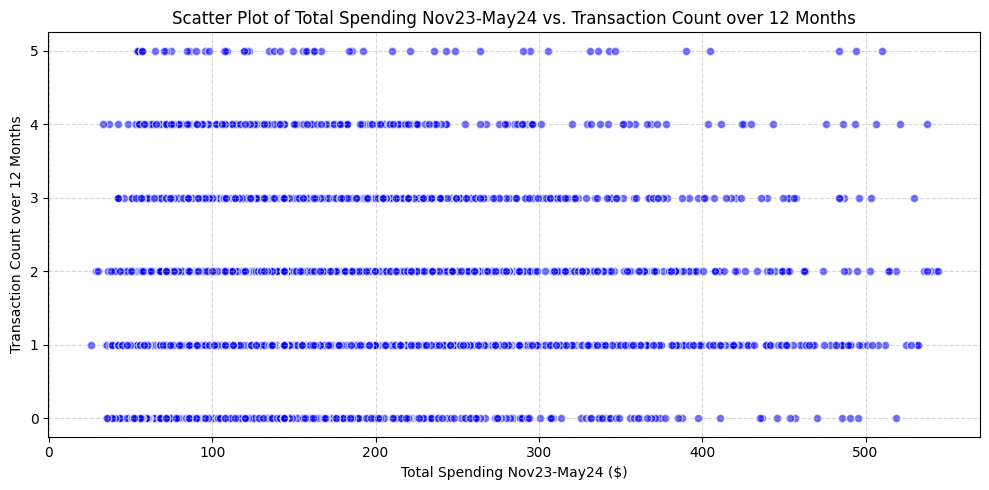

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(tdata['Total_Spent_Nov23_May24'], tdata['Transaction_Count_12M'], alpha=0.6, edgecolors='w', color='blue')

# Customizing the plot
plt.title('Scatter Plot of Total Spending Nov23-May24 vs. Transaction Count over 12 Months')
plt.xlabel('Total Spending Nov23-May24 ($)')
plt.ylabel('Transaction Count over 12 Months')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

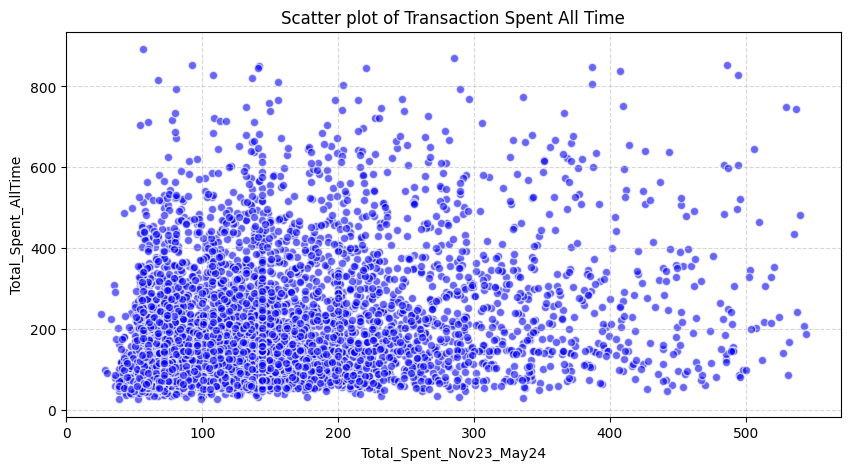

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.scatter(tdata['Total_Spent_Nov23_May24'], tdata['Total_Spent_AllTime'],alpha=0.6, edgecolors='w', color='blue')
plt.xlabel('Total_Spent_Nov23_May24')
plt.ylabel('Total_Spent_AllTime')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title("Scatter plot of Transaction Spent All Time")
plt.savefig('plot.png')

# **2.1 Correlation Analysis**

Correlation between Total Spent Nov 2023- May 2024  and all the other transactional data


In [ ]:
# Calculate the correlation matrix
corr_matrix = tdata.corr(numeric_only=True)

# Extract the correlation of Total_Spent_Nov23_May24 with other variables
corr_with_target = corr_matrix['Total_Spent_Nov23_May24'].sort_values(ascending=False) # Extract the column from the correlation matrix

# Display the correlations
print(corr_with_target)

Total_Spent_Nov23_May24        1.000000
Total_Spent_Nov23_May24_log    0.949957
Total_Spent_AllTime_log        0.293634
Total_Spent_AllTime            0.286210
Total_Spent_12M                0.266520
Total_Spent_9M                 0.251298
Total_Spent_6M                 0.215257
Transaction_Count_AllTime      0.152288
Total_Spent_3M                 0.149072
Total_Spent_12M_log            0.143650
Transaction_Count_12M          0.139931
Transaction_Count_9M           0.133641
Total_Spent_9M_log             0.127547
Transaction_Count_6M           0.119733
Total_Spent_6M_log             0.118690
Total_Spent_1M                 0.106943
Total_Spent_3M_log             0.094854
Transaction_Count_3M           0.089777
Total_Spent_1M_log             0.072598
Transaction_Count_1M           0.060469
Name: Total_Spent_Nov23_May24, dtype: float64


Product data

In [ ]:
#Get the necessary columns
pdata= df[['Total_Spent_Nov23_May24','Brand Description_Anthelios','Brand Description_Bundle','Brand Description_Cicaplast','Brand Description_Eau Thermale','Brand Description_Effaclar','Brand Description_Hyalu B5','Brand Description_Lipikar','Brand Description_Niacinamide','Brand Description_Retinol LRP','Brand Description_Serozinc','Brand Description_Toleriane','Brand Description_Uvidea','Brand Description_Vitamin C']]

In [ ]:
pdata.describe()

Total_Spent_Nov23_May24  Brand Description_Anthelios  \
count              6400.000000                  6400.000000   
mean                162.998742                     0.580000   
std                 127.477466                     1.007476   
min                  25.510000                     0.000000   
25%                  79.950000                     0.000000   
50%                 124.355000                     0.000000   
75%                 200.825000                     1.000000   
max                1379.580000                    13.000000   

       Brand Description_Bundle  Brand Description_Cicaplast  \
count               6400.000000                  6400.000000   
mean                   0.040781                     0.338281   
std                    0.237307                     0.850124   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                    5.000000                    14.000000   

       Brand Description_Eau Thermale  Brand Description_Effaclar  \
count                     6400.000000                 6400.000000   
mean                         0.034063                    0.709063   
std                          0.209396                    1.449481   
min                          0.000000                    0.000000   
25%                          0.000000                    0.000000   
50%                          0.000000                    0.000000   
75%                          0.000000                    1.000000   
max                          4.000000                   16.000000   

       Brand Description_Hyalu B5  Brand Description_Lipikar  \
count                 6400.000000                6400.000000   
mean                     0.316094                   0.203594   
std                      0.778234                   0.725888   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                     11.000000                  12.000000   

       Brand Description_Niacinamide  Brand Description_Retinol LRP  \
count                    6400.000000                    6400.000000   
mean                        0.151250                       0.244844   
std                         0.490508                       0.631185   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         9.000000                       7.000000   

       Brand Description_Serozinc  Brand Description_Toleriane  \
count                 6400.000000                  6400.000000   
mean                     0.030156                     0.892969   
std                      0.206618                     1.908260   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     1.000000   
max                      4.000000                    28.000000   

       Brand Description_Uvidea  Brand Description_Vitamin C  
count               6400.000000                  6400.000000  
mean                   0.075625                     0.228594  
std                    0.321496                     0.607111  
min                    0.000000                     0.000000  
25%                    0.000000                     0.000000  
50%                    0.000000                   

In [ ]:
# Calculate the correlation matrix
corr_matrix = pdata.corr(numeric_only=True)

# Extract the correlation of Total_Spent_Nov23_May24 with other variables
corr_with_target = corr_matrix['Total_Spent_Nov23_May24'].sort_values(ascending=False) # Extract the column from the correlation matrix

# Display the correlations
print(corr_with_target)

Total_Spent_Nov23_May24           1.000000
Brand Description_Hyalu B5        0.233312
Brand Description_Toleriane       0.194177
Brand Description_Vitamin C       0.186969
Brand Description_Retinol LRP     0.174980
Brand Description_Niacinamide     0.153999
Brand Description_Cicaplast       0.104933
Brand Description_Lipikar         0.097953
Brand Description_Effaclar        0.089633
Brand Description_Anthelios       0.063093
Brand Description_Uvidea          0.034939
Brand Description_Bundle          0.026695
Brand Description_Serozinc        0.024932
Brand Description_Eau Thermale    0.008967
Name: Total_Spent_Nov23_May24, dtype: float64


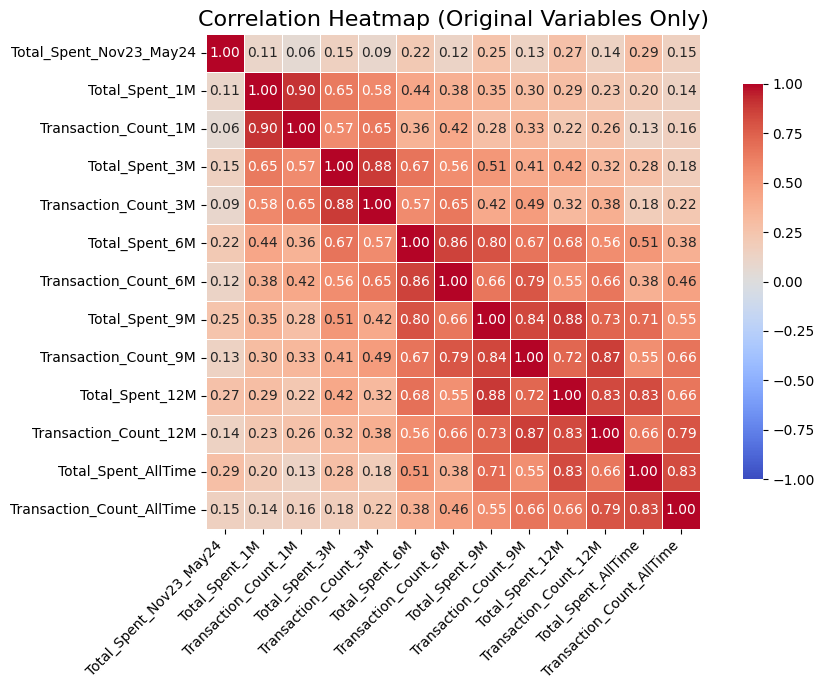

In [ ]:

# Select only the original numeric columns (excluding log-transformed ones)
numeric_cols = tdata.select_dtypes(include=['float64', 'int64']).columns
original_cols = [col for col in numeric_cols if not col.endswith('_log')]

# Calculate the correlation matrix
corr_matrix = tdata[original_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, fmt='.2f')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Set title
plt.title('Correlation Heatmap (Original Variables Only)', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

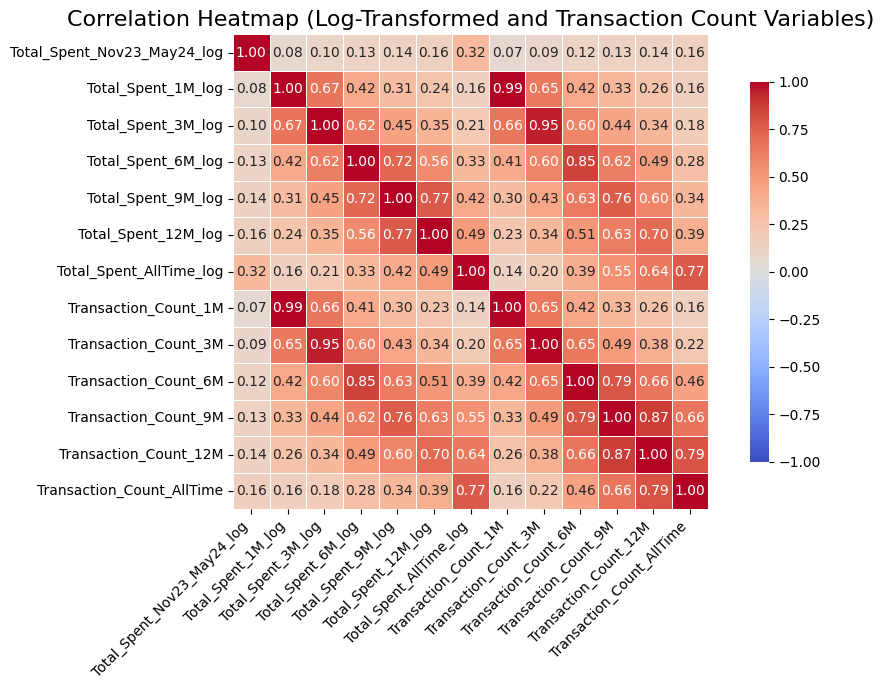

In [ ]:

# Select log-transformed variables
log_cols = [col for col in tdata.columns if col.endswith('_log')]

# Select transaction count variables
count_cols = [col for col in tdata.columns if 'Transaction_Count' in col]

# Combine log and count columns
selected_cols = log_cols + count_cols

# Calculate the correlation matrix
corr_matrix = tdata[selected_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, fmt='.2f')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Set title
plt.title('Correlation Heatmap (Log-Transformed and Transaction Count Variables)', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Create tldata DataFrame
log_cols = [col for col in tdata.columns if col.endswith('_log')]
count_cols = [col for col in tdata.columns if 'Transaction_Count' in col]
selected_cols = log_cols + count_cols

tldata = tdata[selected_cols].copy()

tldata.head()


Total_Spent_Nov23_May24_log  Total_Spent_1M_log  Total_Spent_3M_log  \
0                     4.794219            4.969813            4.969813   
1                     6.136733            0.000000            0.000000   
2                     3.674020            0.000000            0.000000   
3                     5.131377            4.312409            4.312409   
4                     4.422208            0.000000            0.000000   

   Total_Spent_6M_log  Total_Spent_9M_log  Total_Spent_12M_log  \
0            4.969813            4.969813             4.969813   
1            5.248917            5.248917             5.248917   
2            5.091232            5.091232             5.091232   
3            4.312409            4.312409             4.312409   
4            0.000000            0.000000             0.000000   

   Total_Spent_AllTime_log  Transaction_Count_1M  Transaction_Count_3M  \
0                 4.969813                     1                     1   
1                 5.248917                     0                     0   
2                 5.091232                     0                     0   
3                 4.312409                     1                     1   
4                 4.498142                     0                     0   

   Transaction_Count_6M  Transaction_Count_9M  Transaction_Count_12M  \
0                     1                     1                      1   
1                     1                     1                      1   
2                     1                     1                      1   
3                     1                     1                      1   
4                     0                     0                      0   

   Transaction_Count_AllTime  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1

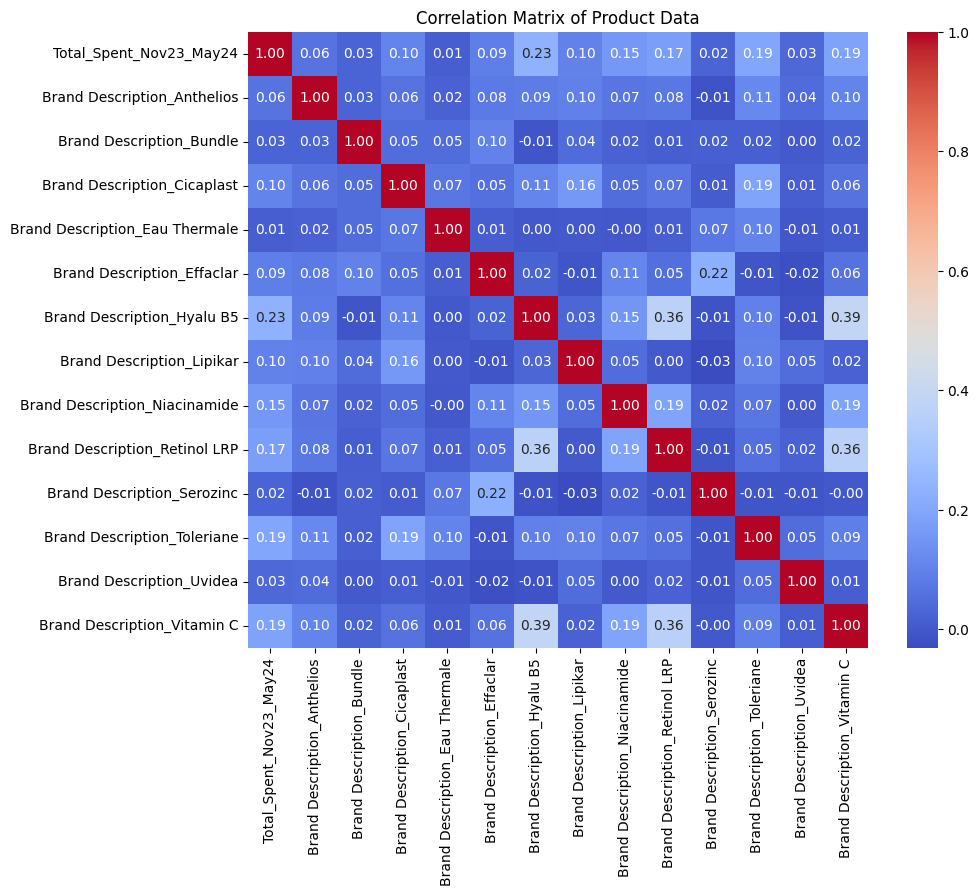

In [ ]:

# Calculate correlation matrix for transactional data
corr_matrix_tdata = tdata.corr(numeric_only=True)
corr_with_target_tdata = corr_matrix_tdata['Total_Spent_Nov23_May24'].sort_values(ascending=False)


# Extracting product data columns based on provided column names
product_columns = ['Total_Spent_Nov23_May24', 'Brand Description_Anthelios', 'Brand Description_Bundle',
                   'Brand Description_Cicaplast', 'Brand Description_Eau Thermale', 'Brand Description_Effaclar',
                   'Brand Description_Hyalu B5', 'Brand Description_Lipikar', 'Brand Description_Niacinamide',
                   'Brand Description_Retinol LRP', 'Brand Description_Serozinc', 'Brand Description_Toleriane',
                   'Brand Description_Uvidea', 'Brand Description_Vitamin C']

pdata = df[product_columns]

# Calculate correlation matrix for product data
corr_matrix_pdata = pdata.corr(numeric_only=True)
corr_with_target_pdata = corr_matrix_pdata['Total_Spent_Nov23_May24'].sort_values(ascending=False)

# # Display the correlations for product data
# print("\nCorrelation with Total Spent Nov23-May24 (Product Data):")
# print(corr_with_target_pdata)

# Optional: Visualizing the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pdata, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Product Data')
plt.show()


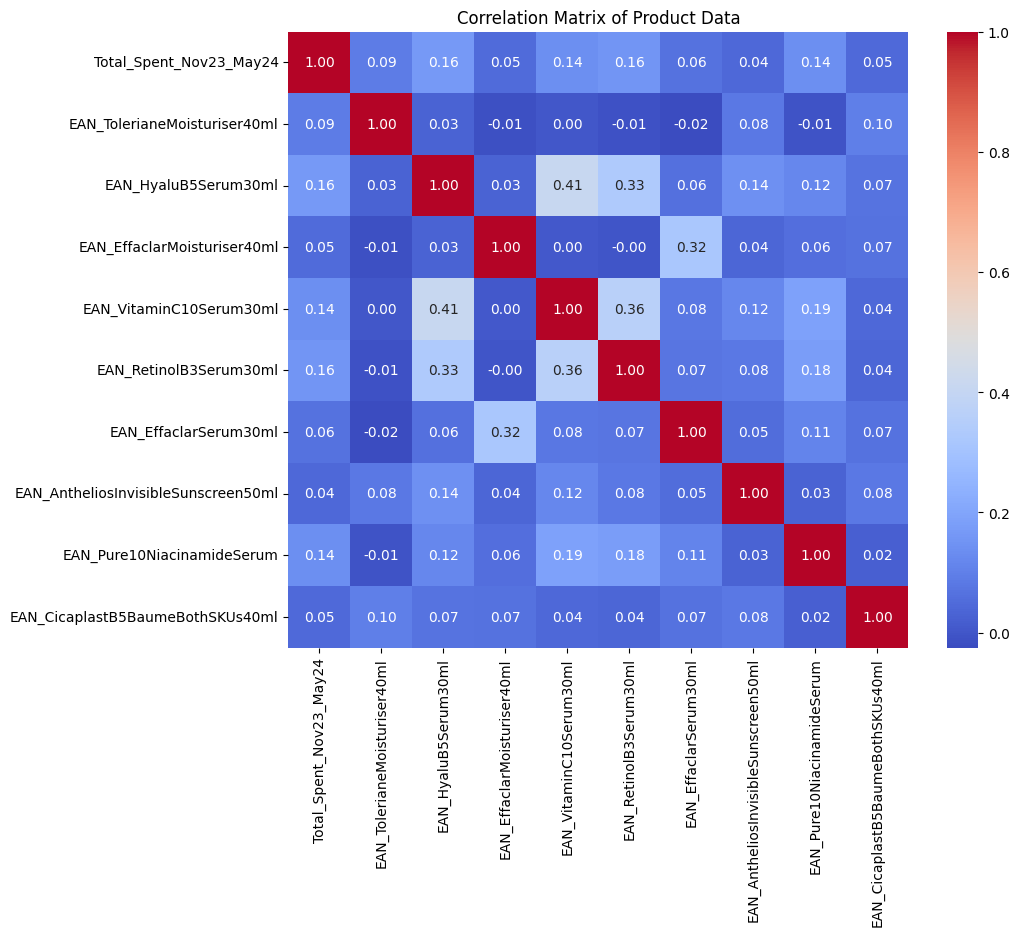

In [ ]:

# Calculate correlation matrix for transactional data
corr_matrix_tdata = tdata.corr(numeric_only=True)
corr_with_target_tdata = corr_matrix_tdata['Total_Spent_Nov23_May24'].sort_values(ascending=False)

# # Display the correlations for transactional data
# print("Correlation with Total Spent Nov23-May24 (Transactional Data):")
# print(corr_with_target_tdata)

# Extracting product data columns based on provided column names
product_columns = ['Total_Spent_Nov23_May24', 'EAN_TolerianeMoisturiser40ml', 'EAN_HyaluB5Serum30ml',
                   'EAN_EffaclarMoisturiser40ml', 'EAN_VitaminC10Serum30ml', 'EAN_RetinolB3Serum30ml',
                   'EAN_EffaclarSerum30ml', 'EAN_AntheliosInvisibleSunscreen50ml', 'EAN_Pure10NiacinamideSerum',
                   'EAN_CicaplastB5BaumeBothSKUs40ml']

pdata = df[product_columns]

# Calculate correlation matrix for product data
corr_matrix_pdata = pdata.corr(numeric_only=True)
corr_with_target_pdata = corr_matrix_pdata['Total_Spent_Nov23_May24'].sort_values(ascending=False)

# # Display the correlations for product data
# print("\nCorrelation with Total Spent Nov23-May24 (Product Data):")
# print(corr_with_target_pdata)

# Optional: Visualizing the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pdata, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Product Data')
plt.show()


# **2.3 Cluster Analysis**

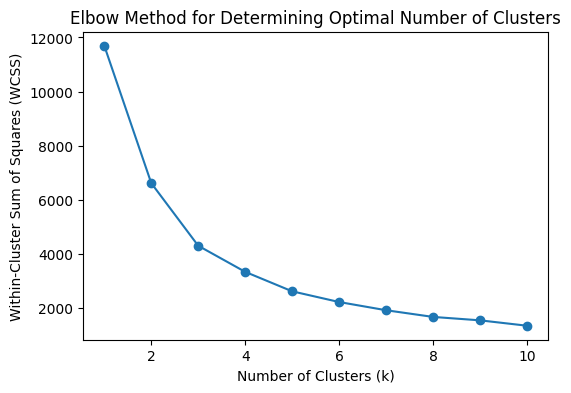

In [ ]:

# Step 1: Select the relevant features for clustering
X = tdata[['Total_Spent_Nov23_May24', 'Total_Spent_AllTime']]

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Define a range of k values
wcss = []
k_values = range(1, 11)

# Step 2: Compute WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the given k

# Step 3: Plot the WCSS against the number of clusters
plt.figure(figsize=(6, 4))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

<ipython-input-29-35ed399141cc>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-35ed399141cc>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



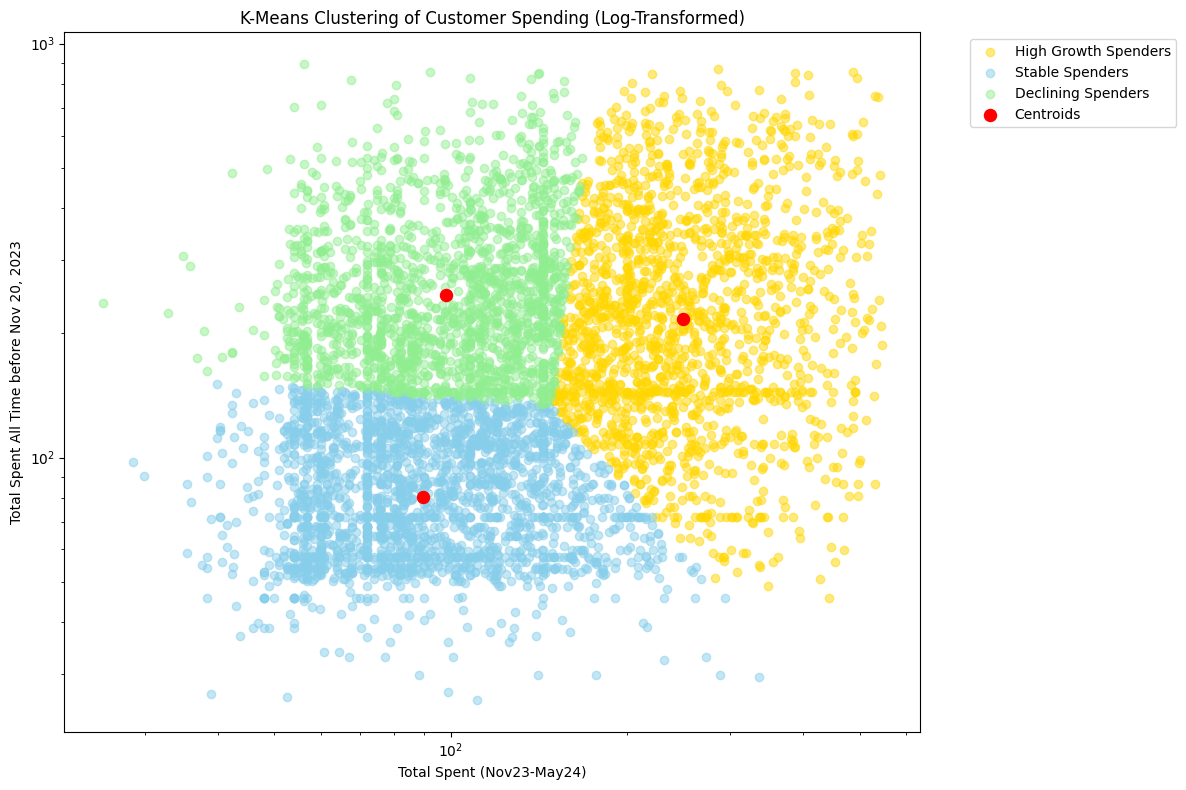

Customer_Segment_Name
Stable Spenders         2369
Declining Spenders      1791
High Growth Spenders    1688
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare data
X = tdata[['Total_Spent_Nov23_May24', 'Total_Spent_AllTime']]

# Log transform the data (adding 1 to handle zero values)
X_log = np.log1p(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
tdata['Customer_Segment_Numeric'] = kmeans.fit_predict(X_scaled)

# Map numeric labels to descriptive names
segment_names = {0: 'High Growth Spenders', 1: 'Stable Spenders', 2: 'Declining Spenders'}
tdata['Customer_Segment_Name'] = tdata['Customer_Segment_Numeric'].map(segment_names)

# Plot clusters with centroids
centroids = kmeans.cluster_centers_
centroids_unnorm = scaler.inverse_transform(centroids)
centroids_original = np.expm1(centroids_unnorm)  # Transform back to original scale

plt.figure(figsize=(12, 8))
for segment, color in zip(segment_names.values(), ['gold', 'skyblue', 'lightgreen']):
    mask = tdata['Customer_Segment_Name'] == segment
    plt.scatter(tdata.loc[mask, 'Total_Spent_Nov23_May24'],
                tdata.loc[mask, 'Total_Spent_AllTime'],
                label=segment, alpha=0.5, color=color)

plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=300, c='red', marker='.', label='Centroids')
plt.xlabel('Total Spent (Nov23-May24)')
plt.ylabel('Total Spent All Time before Nov 20, 2023')
plt.title('K-Means Clustering of Customer Spending (Log-Transformed)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Print cluster sizes
print(tdata['Customer_Segment_Name'].value_counts())

In [ ]:


# Calculate cluster statistics
cluster_stats = tdata.groupby('Customer_Segment_Name').agg({
    'Total_Spent_Nov23_May24': ['mean', 'median', 'count'],
    'Total_Spent_AllTime': ['mean', 'median']
}).round(2)

print("\nCluster Statistics:")
print(cluster_stats)

# Create dummy variables for each segment
segment_dummies = pd.get_dummies(tdata['Customer_Segment_Name'], prefix='Segment')
tdata = pd.concat([tdata, segment_dummies], axis=1)

# Display the first few rows of the updated DataFrame
print("\nFirst few rows of the updated DataFrame:")

(tdata[['Total_Spent_Nov23_May24', 'Total_Spent_AllTime', 'Customer_Segment_Numeric', 'Customer_Segment_Name']].head())



Cluster Statistics:
                      Total_Spent_Nov23_May24                \
                                         mean  median count   
Customer_Segment_Name                                         
Declining Spenders                     103.16  104.84  1791   
High Growth Spenders                   262.05  236.66  1688   
Stable Spenders                         96.79   85.38  2369   

                      Total_Spent_AllTime          
                                     mean  median  
Customer_Segment_Name                              
Declining Spenders                 269.93  229.65  
High Growth Spenders               256.96  212.38  
Stable Spenders                     84.91   79.48  

First few rows of the updated DataFrame:


Total_Spent_Nov23_May24  Total_Spent_AllTime  Customer_Segment_Numeric  \
0                   119.81               143.00                         2   
1                   461.54               189.36                         0   
2                    38.41               161.59                         2   
3                   168.25                73.62                         1   
4                    82.28                88.85                         1   

  Customer_Segment_Name  
0    Declining Spenders  
1  High Growth Spenders  
2    Declining Spenders  
3       Stable Spenders  
4       Stable Spenders

In [ ]:
tdata.describe()

Total_Spent_Nov23_May24  Total_Spent_1M  Transaction_Count_1M  \
count              5848.000000     5848.000000           5848.000000   
mean                146.443112       24.163415              0.226915   
std                  92.481860       49.477503              0.418873   
min                  25.510000        0.000000              0.000000   
25%                  77.900000        0.000000              0.000000   
50%                 118.360000        0.000000              0.000000   
75%                 184.885000        0.000000              0.000000   
max                 544.140000      243.040000              1.000000   

       Total_Spent_3M  Transaction_Count_3M  Total_Spent_6M  \
count     5848.000000           5848.000000     5848.000000   
mean        47.102079              0.439295       90.849201   
std         68.434012              0.571911       93.507698   
min          0.000000              0.000000        0.000000   
25%          0.000000              0.000000        0.000000   
50%          0.000000              0.000000       72.855000   
75%         89.450000              1.000000      143.850000   
max        344.650000              2.000000      517.700000   

       Transaction_Count_6M  Total_Spent_9M  Transaction_Count_9M  \
count           5848.000000     5848.000000           5848.000000   
mean               0.850034      126.779458              1.190321   
std                0.783082      110.704202              0.921697   
min                0.000000        0.000000              0.000000   
25%                0.000000       54.320000              1.000000   
50%                1.000000      107.840000              1.000000   
75%                1.000000      181.495000              2.000000   
max                4.000000      646.690000              5.000000   

       Total_Spent_12M  ...  Total_Spent_AllTime  Transaction_Count_AllTime  \
count      5848.000000  ...          5848.000000                5848.000000   
mean        151.119405  ...           191.235761                   1.817886   
std         121.029421  ...           141.599068                   1.172854   
min           0.000000  ...            25.910000                   1.000000   
25%          68.325000  ...            86.320000                   1.000000   
50%         121.850000  ...           143.900000                   1.000000   
75%         208.892500  ...           248.325000                   2.000000   
max         740.270000  ...           892.470000                   7.000000   

       Total_Spent_Nov23_May24_log  Total_Spent_1M_log  Total_Spent_3M_log  \
count                  5848.000000         5848.000000         5848.000000   
mean                      4.828045            1.041734            1.862711   
std                       0.561979            1.933323            2.305718   
min                       3.277522            0.000000            0.000000   
25%                       4.368181            0.000000            0.000000   
50%                       4.782144            0.000000            0.000000   
75%                       5.225128            0.000000            4.504797   
max                       6.301043            5.497332            5.845427   

       Total_Spent_6M_log  Total_Spent_9M_log  Total_Spent_12M_log  \
count         5848.000000         5848.000000          5848.000000   
mean             3.116113            3.905554             4.372375   
std              2.333087            2.039075             1.695827   
min              0.000000            0.000000             0.000000   
25%              0.000000            4.013135             4.238806   
50%              4.302104            4.689879             4.810964   
75%              4.975699            5.206723             5.346595   
max              6.251326            6.473412             6.608365   

       Total_Spent_AllTime_log  Customer_Segment_Numeric  
count              5848.000000               5848.000000  
mean

In [ ]:
tdata.head()

Total_Spent_Nov23_May24  Total_Spent_1M  Transaction_Count_1M  \
0                   119.81          143.00                     1   
1                   461.54            0.00                     0   
2                    38.41            0.00                     0   
3                   168.25           73.62                     1   
4                    82.28            0.00                     0   

   Total_Spent_3M  Transaction_Count_3M  Total_Spent_6M  Transaction_Count_6M  \
0          143.00                     1          143.00                     1   
1            0.00                     0          189.36                     1   
2            0.00                     0          161.59                     1   
3           73.62                     1           73.62                     1   
4            0.00                     0            0.00                     0   

   Total_Spent_9M  Transaction_Count_9M  Total_Spent_12M  ...  \
0          143.00                     1           143.00  ...   
1          189.36                     1           189.36  ...   
2          161.59                     1           161.59  ...   
3           73.62                     1            73.62  ...   
4            0.00                     0             0.00  ...   

   Total_Spent_3M_log  Total_Spent_6M_log  Total_Spent_9M_log  \
0            4.969813            4.969813            4.969813   
1            0.000000            5.248917            5.248917   
2            0.000000            5.091232            5.091232   
3            4.312409            4.312409            4.312409   
4            0.000000            0.000000            0.000000   

   Total_Spent_12M_log  Total_Spent_AllTime_log  Customer_Segment_Numeric  \
0             4.969813                 4.969813                         2   
1             5.248917                 5.248917                         0   
2             5.091232                 5.091232                         2   
3             4.312409                 4.312409                         1   
4             0.000000                 4.498142                         1   

   Customer_Segment_Name  Segment_Declining Spenders  \
0     Declining Spenders                        True   
1   High Growth Spenders                       False   
2     Declining Spenders                        True   
3        Stable Spenders                       False   
4        Stable Spenders                       False   

   Segment_High Growth Spenders  Segment_Stable Spenders  
0                         False                    False  
1                          True                    False  
2                         False                    False  
3                         False                     True  
4                         False                     True  

[5 rows x 25 columns]

#**3. Feature Engineering**

### Transaction frequency

In [ ]:
# Transaction frequency calculation
tdata['Transaction_Frequency_1M'] = tdata['Transaction_Count_1M'] / 1  # Transactions per month in the 1M period
tdata['Transaction_Frequency_3M'] = tdata['Transaction_Count_3M'] / 3  # Transactions per month in the 3M period
tdata['Transaction_Frequency_6M'] = tdata['Transaction_Count_6M'] / 6  # Transactions per month in the 6M period
tdata['Transaction_Frequency_9M'] = tdata['Transaction_Count_9M'] / 9  # Transactions per month in the 9M period
tdata['Transaction_Frequency_12M'] = tdata['Transaction_Count_12M'] / 12 # Transactions per month in the 12M period

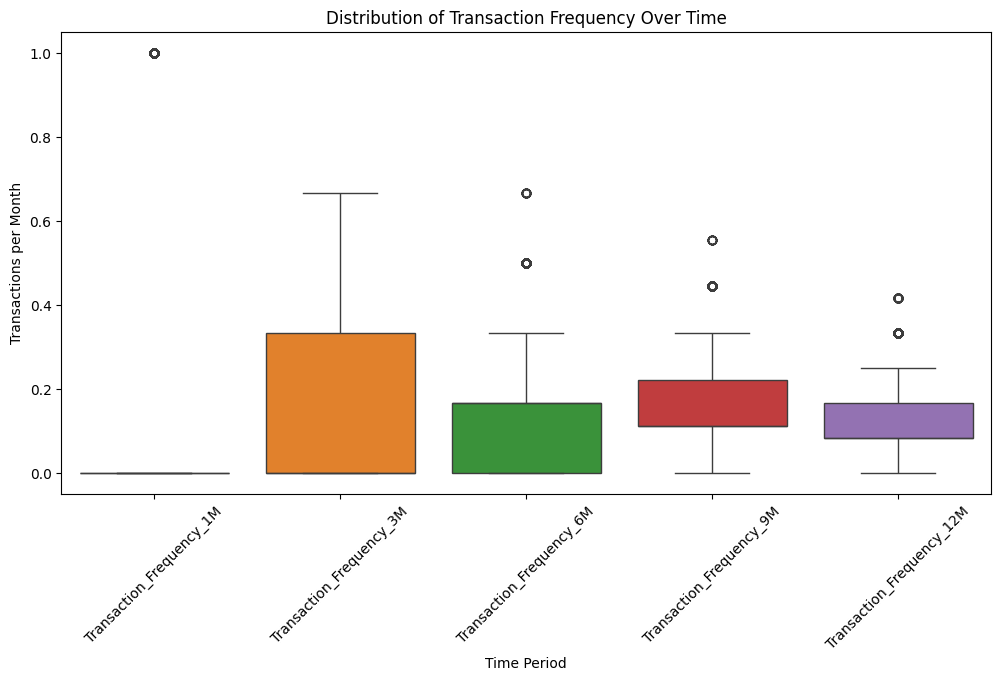

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=tdata[['Transaction_Frequency_1M', 'Transaction_Frequency_3M',
                        'Transaction_Frequency_6M', 'Transaction_Frequency_9M',
                        'Transaction_Frequency_12M']])
plt.title('Distribution of Transaction Frequency Over Time')
plt.ylabel('Transactions per Month')
plt.xlabel('Time Period')
plt.xticks(rotation=45)
plt.show()

### Transaction Frequency Change & Spending Trend

In [ ]:
# 1. Transaction Frequency Change: Difference between short-term (1M) and longer-term (3M, 6M) transaction frequency
tdata['Frequency_Change_1M_vs_3M'] = tdata['Transaction_Frequency_1M'] - tdata['Transaction_Frequency_3M']
tdata['Frequency_Change_1M_vs_6M'] = tdata['Transaction_Frequency_1M'] - tdata['Transaction_Frequency_6M']
tdata['Frequency_Change_1M_vs_9M'] = tdata['Transaction_Frequency_1M'] - tdata['Transaction_Frequency_9M']
tdata['Frequency_Change_1M_vs_12M'] = tdata['Transaction_Frequency_1M'] - tdata['Transaction_Frequency_12M']

tdata['Frequency_Change_3M_vs_6M'] = tdata['Transaction_Frequency_3M'] - tdata['Transaction_Frequency_6M']
tdata['Frequency_Change_3M_vs_9M'] = tdata['Transaction_Frequency_3M'] - tdata['Transaction_Frequency_9M']
tdata['Frequency_Change_3M_vs_12M'] = tdata['Transaction_Frequency_3M'] - tdata['Transaction_Frequency_12M']

tdata['Frequency_Change_6M_vs_9M'] = tdata['Transaction_Frequency_6M'] - tdata['Transaction_Frequency_9M']
tdata['Frequency_Change_6M_vs_12M'] = tdata['Transaction_Frequency_6M'] - tdata['Transaction_Frequency_12M']

tdata['Frequency_Change_9M_vs_12M'] = tdata['Transaction_Frequency_9M'] - tdata['Transaction_Frequency_12M']



# 2. Spending Trend: Ratio of recent to past spending (1M vs 6M, 3M vs 6M)
tdata['Spending_Trend_1M_vs_3M'] = tdata['Total_Spent_1M'] / tdata['Total_Spent_3M'].replace(0, 1)
tdata['Spending_Trend_1M_vs_6M'] = tdata['Total_Spent_1M'] / tdata['Total_Spent_6M'].replace(0, 1)
tdata['Spending_Trend_1M_vs_9M'] = tdata['Total_Spent_1M'] / tdata['Total_Spent_9M'].replace(0, 1)
tdata['Spending_Trend_1M_vs_12M'] = tdata['Total_Spent_1M'] / tdata['Total_Spent_12M'].replace(0, 1)

tdata['Spending_Trend_3M_vs_6M'] = tdata['Total_Spent_3M'] / tdata['Total_Spent_6M'].replace(0, 1)
tdata['Spending_Trend_3M_vs_9M'] = tdata['Total_Spent_3M'] / tdata['Total_Spent_9M'].replace(0, 1)
tdata['Spending_Trend_3M_vs_12M'] = tdata['Total_Spent_3M'] / tdata['Total_Spent_12M'].replace(0, 1)

tdata['Spending_Trend_6M_vs_9M'] = tdata['Total_Spent_6M'] / tdata['Total_Spent_9M'].replace(0, 1)
tdata['Spending_Trend_6M_vs_12M'] = tdata['Total_Spent_6M'] / tdata['Total_Spent_12M'].replace(0, 1)
tdata['Spending_Trend_9M_vs_12M'] = tdata['Total_Spent_9M'] / tdata['Total_Spent_12M'].replace(0, 1)

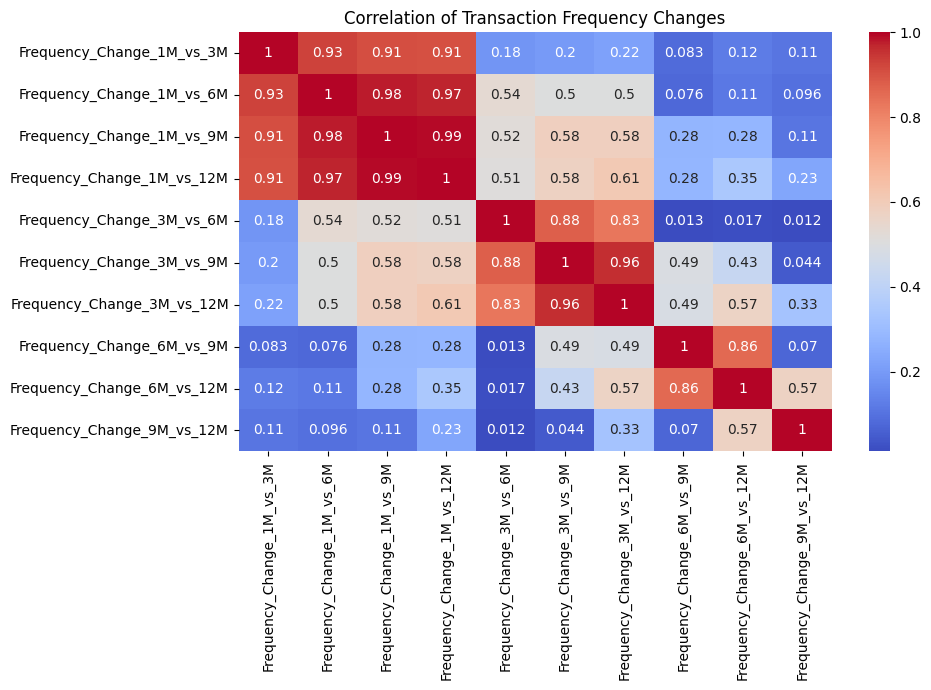

In [ ]:
freq_change_cols = [col for col in tdata.columns if col.startswith('Frequency_Change')]
plt.figure(figsize=(10, 7))
sns.heatmap(tdata[freq_change_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Transaction Frequency Changes')
plt.tight_layout()
plt.show()

### Total Spenting Between November2022 to 2023

In [ ]:
# Create a new column for Total spent between Nov 22 to May 23
tdata['Total_Spent_Nov22_May23'] = tdata['Total_Spent_12M'] - tdata['Total_Spent_6M']

# Display the new column
print(tdata[['Total_Spent_12M', 'Total_Spent_6M', 'Total_Spent_Nov22_May23']].head())

# Optionally, you can calculate summary statistics for the new column
nov22_may23_stats = tdata['Total_Spent_Nov22_May23'].describe()
print("Summary statistics for Total Spent between Nov 22 and May 23:")
print(nov22_may23_stats)


   Total_Spent_12M  Total_Spent_6M  Total_Spent_Nov22_May23
0           143.00          143.00                      0.0
1           189.36          189.36                      0.0
2           161.59          161.59                      0.0
3            73.62           73.62                      0.0
4             0.00            0.00                      0.0
Summary statistics for Total Spent between Nov 22 and May 23:
count    5848.000000
mean       60.270203
std        88.937570
min         0.000000
25%         0.000000
50%         0.000000
75%       101.885000
max       733.250000
Name: Total_Spent_Nov22_May23, dtype: float64


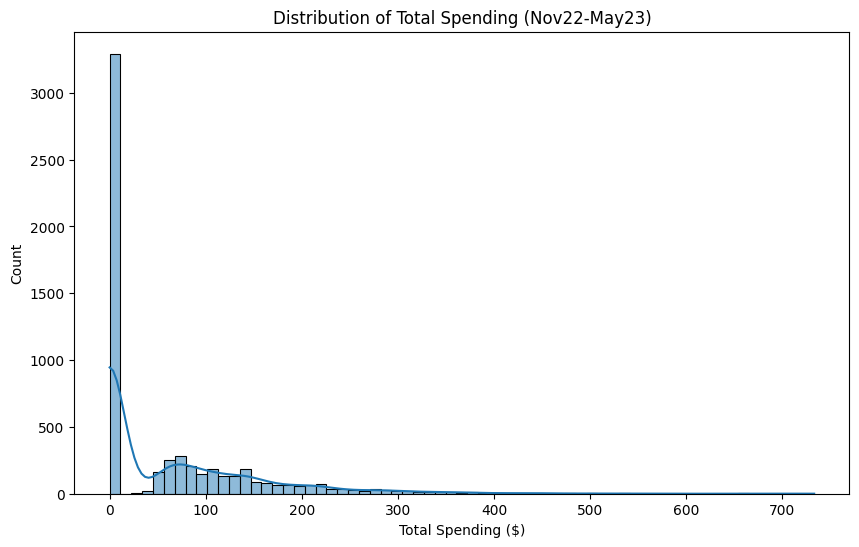

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(tdata['Total_Spent_Nov22_May23'], kde=True)
plt.title('Distribution of Total Spending (Nov22-May23)')
plt.xlabel('Total Spending ($)')
plt.show()

### Spending pattern features

In [ ]:
tdata['avg_order_value'] = tdata['Total_Spent_6M'] / tdata['Transaction_Count_6M']
tdata['spending_growth_rate'] = (tdata['Total_Spent_6M'] - tdata['Total_Spent_12M']) / tdata['Total_Spent_12M']

<ipython-input-40-433165a0c913>:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




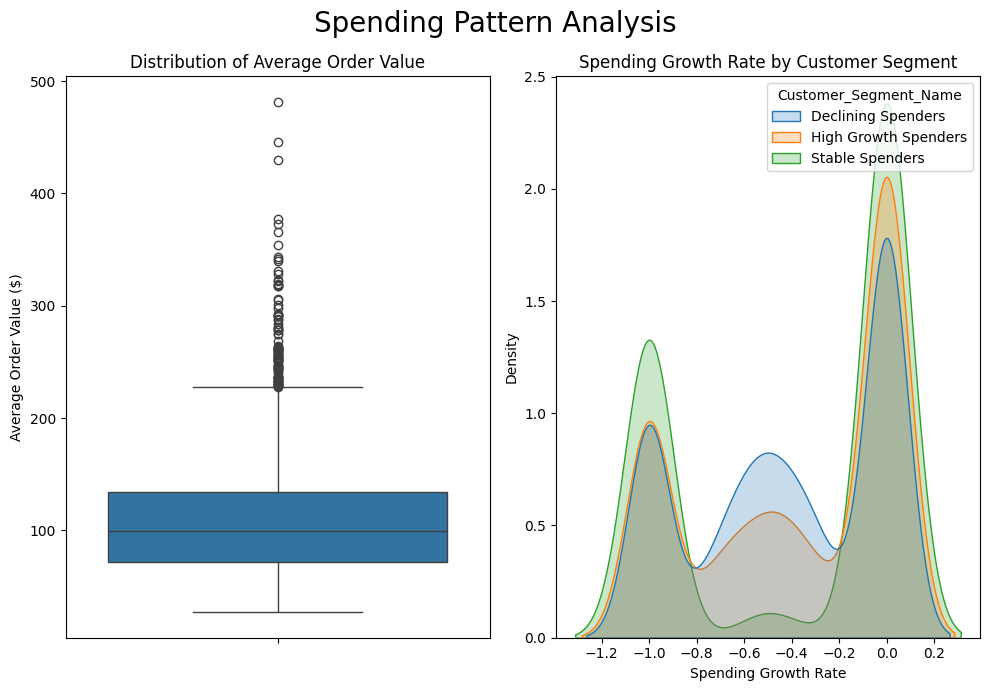


Summary Statistics for Average Order Value:
count    3794.000000
mean      108.403359
std        49.030427
min        27.160000
25%        71.900000
50%        99.345000
75%       134.280000
max       481.550000
Name: avg_order_value, dtype: float64

Summary Statistics for Spending Growth Rate by Segment:
                        count      mean       std  min       25%       50%  \
Customer_Segment_Name                                                        
Declining Spenders     1668.0 -0.406217  0.388536 -1.0 -0.700010 -0.383982   
High Growth Spenders   1546.0 -0.371244  0.411302 -1.0 -0.744747 -0.240938   
Stable Spenders        1950.0 -0.362462  0.471652 -1.0 -1.000000  0.000000   

                       75%  max  
Customer_Segment_Name            
Declining Spenders     0.0  0.0  
High Growth Spenders   0.0  0.0  
Stable Spenders        0.0  0.0  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the plot
plt.figure(figsize=(10, 7))
plt.suptitle('Spending Pattern Analysis', fontsize=20)

# 1. Box plot for Average Order Value
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(y='avg_order_value', data=tdata, ax=ax1)
ax1.set_title('Distribution of Average Order Value')
ax1.set_ylabel('Average Order Value ($)')

# 2. KDE plot for Spending Growth Rate by Customer Segment
ax2 = plt.subplot(1, 2, 2)
sns.kdeplot(data=tdata, x='spending_growth_rate', hue='Customer_Segment_Name',
            shade=True, common_norm=False, ax=ax2)
ax2.set_title('Spending Growth Rate by Customer Segment')
ax2.set_xlabel('Spending Growth Rate')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Average Order Value:")
print(tdata['avg_order_value'].describe())

print("\nSummary Statistics for Spending Growth Rate by Segment:")
print(tdata.groupby('Customer_Segment_Name')['spending_growth_rate'].describe())

### Relative spending features

In [ ]:

tdata['spending_percentile'] = tdata.groupby('Customer_Segment_Numeric')['Total_Spent_6M'].rank(pct=True)

<ipython-input-42-349d22cbf40d>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




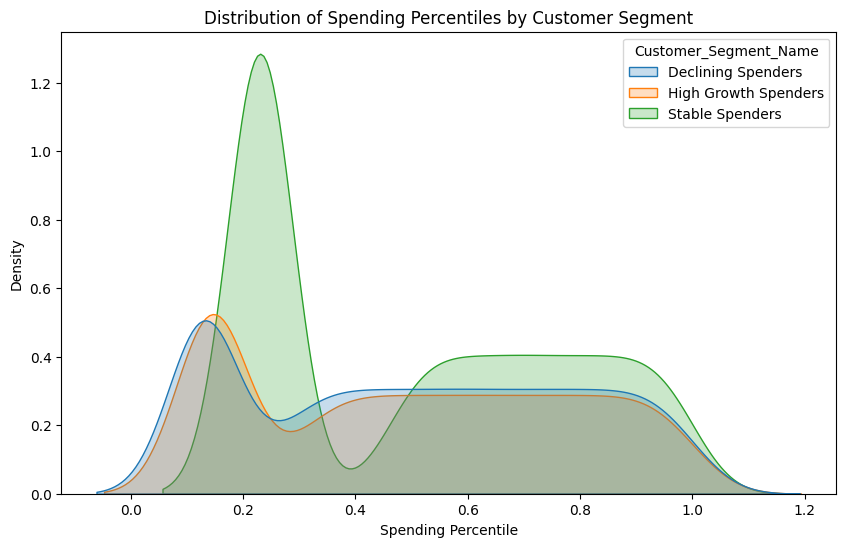

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=tdata, x='spending_percentile', hue='Customer_Segment_Name', shade=True)
plt.title('Distribution of Spending Percentiles by Customer Segment')
plt.xlabel('Spending Percentile')
plt.show()

### Engagement Score

In [ ]:

tdata['Engagement_Score'] = (
    tdata['Transaction_Count_6M'].rank(ascending=True) +
    tdata['Total_Spent_6M'].rank(ascending=True) +
    tdata['spending_growth_rate'].rank(ascending=True)
) / 3

<ipython-input-44-5e0934632028>:8: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-44-5e0934632028>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

48.2%

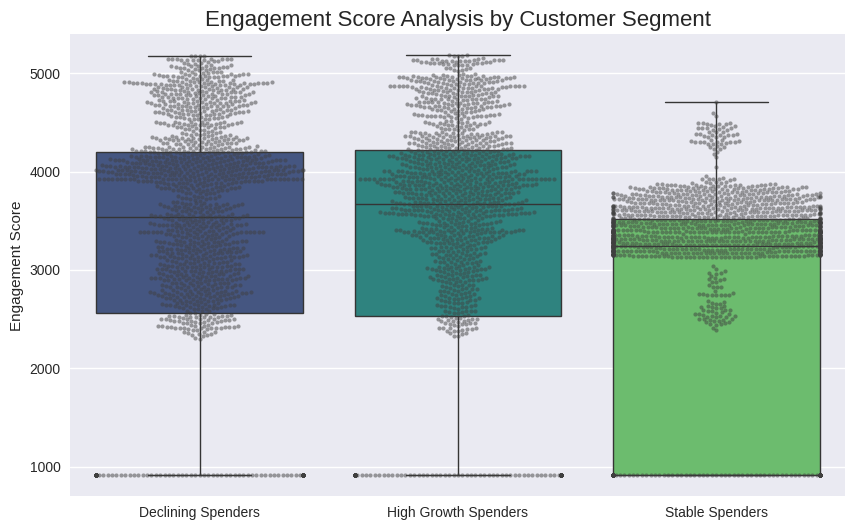

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Set the style for better-looking plots
plt.style.use('seaborn')

# Create a single figure
plt.figure(figsize=(10, 6))
plt.title('Engagement Score Analysis by Customer Segment', fontsize=16)

# 1. Box plot with individual points
sns.boxplot(x='Customer_Segment_Name', y='Engagement_Score', data=tdata, palette='viridis')
sns.swarmplot(x='Customer_Segment_Name', y='Engagement_Score', data=tdata, color='.25', size=3, alpha=0.5)

# Set labels
plt.xlabel('')
plt.ylabel('Engagement Score')
plt.show()




### Polynomial Features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def create_polynomial_features(X, degree=2):
    # Select numerical columns
    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
    X_numeric = X[numeric_cols]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns, index=X_numeric.index)

    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_imputed)

    # Create DataFrame with new feature names
    poly_feature_names = poly.get_feature_names_out(numeric_cols)
    X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names, index=X.index)

    # Combine original categorical features with new polynomial features
    X_combined = pd.concat([X.select_dtypes(exclude=['float64', 'int64']), X_poly_df], axis=1)

    return X_combined

# **4. Model Building**

### Model Selection

Model Comparison:
Random Forest:
  CV RMSE: 0.4412
  Test RMSE: 0.4295
  Test R2: 0.3930

AdaBoost:
  CV RMSE: 0.4754
  Test RMSE: 0.4785
  Test R2: 0.2467

XGBoost:
  CV RMSE: 0.4257
  Test RMSE: 0.4157
  Test R2: 0.4312

Best Model: XGBoost


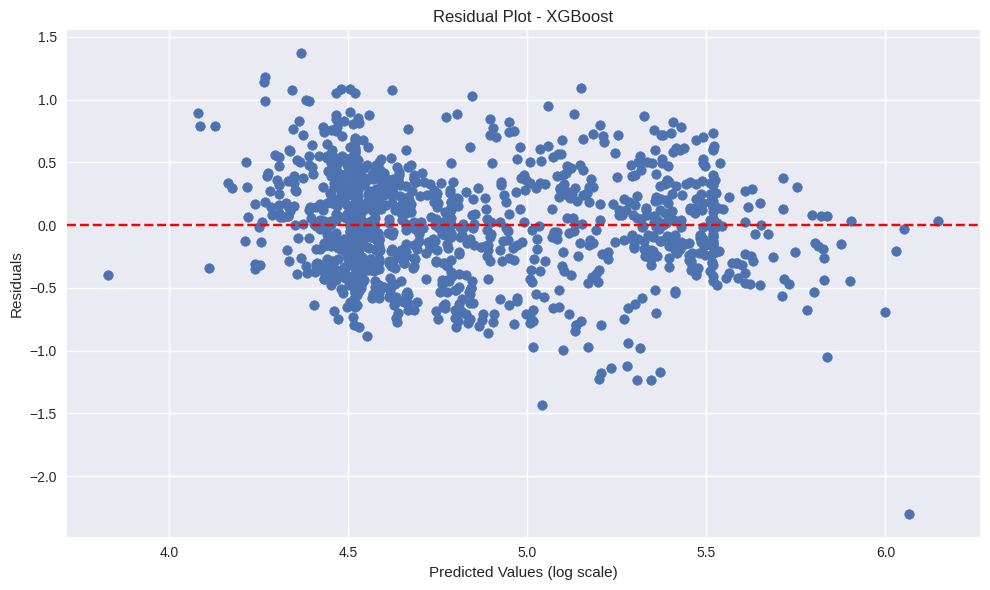


Feature Importance:
                       feature  importance
5          spending_percentile    0.382106
1           Total_Spent_6M_log    0.129268
6             Engagement_Score    0.128279
4         spending_growth_rate    0.127660
0          Total_Spent_12M_log    0.101656
3          avg_order_value_log    0.073363
2  Total_Spent_Nov22_May23_log    0.057668

RMSE in original scale: 66.1762


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming 'tdata' is your DataFrame with all the specified variables

# Log transform relevant columns
log_columns = ['Total_Spent_12M', 'Total_Spent_6M', 'Total_Spent_Nov22_May23', 'avg_order_value', 'Total_Spent_Nov23_May24']
for col in log_columns:
    tdata[f'{col}_log'] = np.log1p(tdata[col])

# Prepare features
feature_cols = [
    'Total_Spent_12M_log', 'Total_Spent_6M_log', 'Total_Spent_Nov22_May23_log',
    'avg_order_value_log', 'spending_growth_rate', 'spending_percentile', 'Engagement_Score',
]

# Prepare features and target
X = tdata[feature_cols]
y = tdata['Total_Spent_Nov23_May24_log']  # Log-transformed target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())

    # Train on full training set
    model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)

    results[name] = {'CV RMSE': cv_rmse, 'Test RMSE': test_rmse, 'Test R2': test_r2}

# Print results
print("Model Comparison:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  CV RMSE: {metrics['CV RMSE']:.4f}")
    print(f"  Test RMSE: {metrics['Test RMSE']:.4f}")
    print(f"  Test R2: {metrics['Test R2']:.4f}")
    print()

# Select the best model (based on Test RMSE)
best_model_name = min(results, key=lambda x: results[x]['Test RMSE'])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")

# Residual plot for the best model
y_pred_best = best_model.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, y_test - y_pred_best)
plt.title(f'Residual Plot - {best_model_name}')
plt.xlabel('Predicted Values (log scale)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Feature Importance for the best model
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)

# Calculate RMSE in original scale
y_pred_original = np.expm1(best_model.predict(X_test_scaled))
y_test_original = np.expm1(y_test)
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print(f"\nRMSE in original scale: {rmse_original:.4f}")

### Model Optimising Using Polynomial Features

Mean Squared Error: 0.1811
R-squared Score: 0.4042


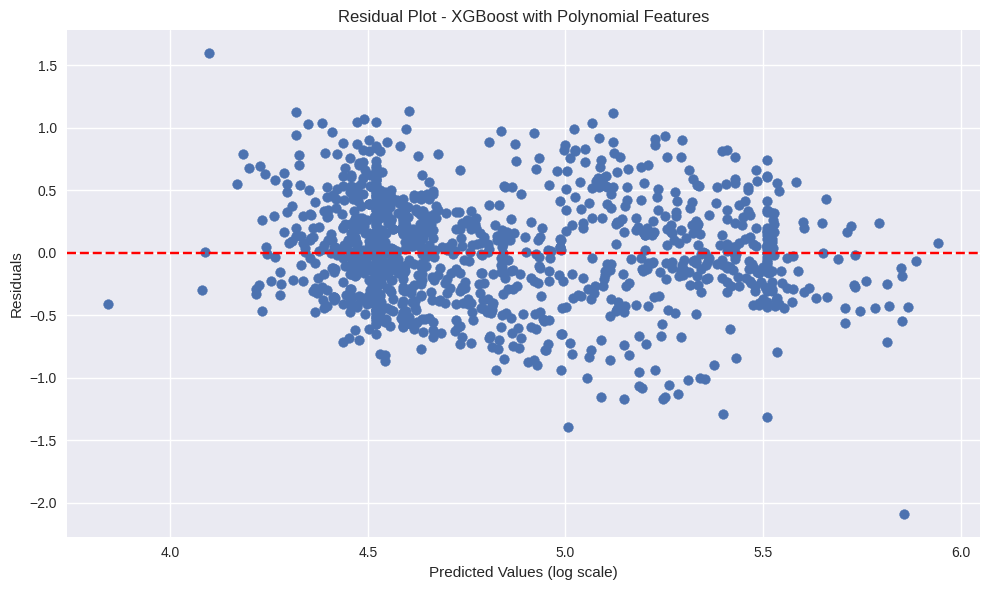

In [ ]:


# Assuming 'X' is feature DataFrame and 'y' is your target variable
# Create polynomial features
X_poly = create_polynomial_features(X, degree=2)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.title('Residual Plot - XGBoost with Polynomial Features')
plt.xlabel('Predicted Values (log scale)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()



### Feature Importance


Top 10 Feature Importance:
                                     feature  importance
27   avg_order_value_log spending_percentile    0.143780
10   Total_Spent_12M_log avg_order_value_log    0.118560
5                        spending_percentile    0.098766
31     spending_growth_rate Engagement_Score    0.056910
8     Total_Spent_12M_log Total_Spent_6M_log    0.048075
12   Total_Spent_12M_log spending_percentile    0.047920
26  avg_order_value_log spending_growth_rate    0.036532
30  spending_growth_rate spending_percentile    0.028671
4                       spending_growth_rate    0.028346
1                         Total_Spent_6M_log    0.028120


<Figure size 1200x600 with 0 Axes>

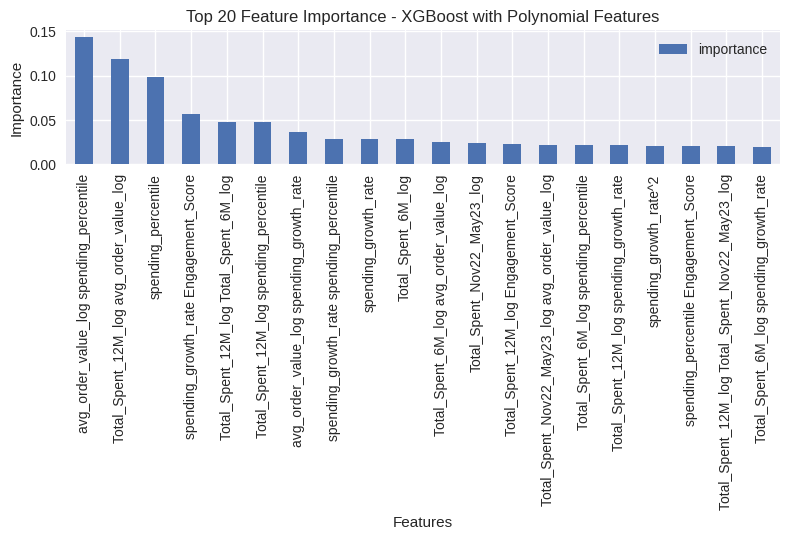

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_poly.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Feature Importance:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance.head(20).plot(x='feature', y='importance', kind='bar')
plt.title('Top 20 Feature Importance - XGBoost with Polynomial Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



### Back Transforming Predictions


In [ ]:
# Assuming y_pred are your log-transformed predictions
y_pred_original = np.expm1(y_pred)

# If you want to calculate RMSE in the original scale:
rmse_original = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_original))
print(f"RMSE in original scale: {rmse_original}")

RMSE in original scale: 69.00968035828319


RMSE in original scale: 69.01
R-squared in original scale: 0.3981
Mean Absolute Percentage Error: 36.20%


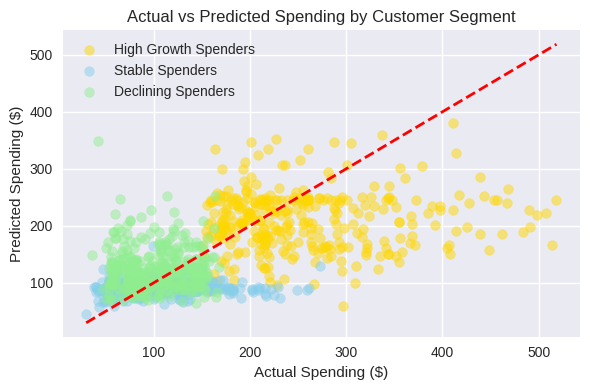

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_pred and y_test are your log-transformed predictions and actual values
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

# Calculate metrics
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2_original = r2_score(y_test_original, y_pred_original)
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

print(f"RMSE in original scale: {rmse_original:.2f}")
print(f"R-squared in original scale: {r2_original:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

# Assuming 'tdata' is your DataFrame and it contains 'Customer_Segment_Name'
# We need to align the customer segments with the test data
test_indices = y_test.index
customer_segments = tdata.loc[test_indices, 'Customer_Segment_Name']

# Create a color map
colors = {'High Growth Spenders': 'gold', 'Stable Spenders': 'skyblue', 'Declining Spenders': 'lightgreen'}

# Plot
plt.figure(figsize=(6, 4))
for segment, color in colors.items():
    mask = customer_segments == segment
    plt.scatter(y_test_original[mask], y_pred_original[mask],
                alpha=0.5, c=color, label=segment)

plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2)
plt.xlabel('Actual Spending ($)')
plt.ylabel('Predicted Spending ($)')
plt.title('Actual vs Predicted Spending by Customer Segment')
plt.legend()
plt.tight_layout()
plt.show()

# **5.Business Implications**



*   The **R-squared of 0.3949** means model explains about 40% of the variation in customer spending. In simple terms,  a decent grasp on spending patterns.
*   The **RMSE of '$69'** tells us that our typical prediction error is around '$70'. This means if we predict a customer will spend '$200', they might actually spend anywhere from '$130' to '$270'.

### Customer Segment
* **Declining Spenders (Light Green)** (left side of graph): Concentrated in the lower spending range.Many points above the line, suggesting overestimation.We might be too optimistic about this group's future spending. This could lead to overallocation of resources or misguided retention efforts.
* **High Growth Spenders (Gold)**: We often underestimate their spending. We might be missing opportunities to cater to these valuable customers. This could lead to missed opportunities in tailored marketing or premium services.
* **Stable Spenders (Sky Blue)**: Clustered mostly in the lower spending range.
Generally close to the prediction line, indicating good accuracy for this segment.Our model performs well for this group, allowing for reliable forecasting and targeted strategies for these consistent customers.


